<center><img src="img/skillfactorylogo.png"></center>

<h1><center>Курс "Практический Machine Learning"</center></h1>
<h3><center>Шестаков Андрей</center></h3>
<hr>
<h2><center>Введение в ML, введение в sklearn</center></h2>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Пролог: Модуль sklearn
На наших практических занятиях мы будем использовать [sklearn](http://scikit-learn.org/stable/index.html) (scikit-learn) - наиболее популярный модуль для работы с методами машинного обучения и анализа данных.

Этот модуль регулярно обновляется, расширяется и сопровождается примерами использования тех или иных методов. 

Помимо самих алгоритмов (например k-средних или линейной регрессии) в нем есть множество вспомогательных функций по работе с данными.

<img src='https://i.stack.imgur.com/IMVOl.png'>

# Туториал: Работа с различными типами признаков

Вспомним какие типы признаков могут встретится при описании объектов исследования и как их представить в доступной для обработки компьтером форме

Типы признаков мы будем рассматривать на примере довольно популярного набора данных [titanic](https://www.kaggle.com/c/titanic/download/train.csv) - информации о выживаемости пассажиров после известной трагедии корабля Titanic.

In [22]:
df_titanic = pd.read_csv('data/titanic.csv', sep=',')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df_titanic.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [24]:
df_titanic = df_titanic.dropna(subset=['Embarked'])

## Бинарные признаки
Это признаки с двумя возможными значениями
* Пол (мужской, женский)
* Выжил (да, нет)

На вход в алгоритмы обычно подаются в виде значений `{0, 1}` (реже в виде `{-1, 1}`)

In [25]:
# Здесь все нормально
df_titanic.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [26]:
# Тут стоит выполнить переобознаение
df_titanic.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [27]:
# Например так
df_titanic.loc[:, 'SexHandEnc'] = df_titanic.Sex.replace({'male': 0, 'female': 1})
df_titanic.SexHandEnc.value_counts()

0    577
1    312
Name: SexHandEnc, dtype: int64

In [28]:
# Или средствами sklearn

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(df_titanic.Sex.values)

enc.transform(df_titanic.Sex.values)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [29]:
enc.classes_
# Значит, что в векторе выше, 0=female, 1=male

array(['female', 'male'], dtype=object)

## Вещественные признаки

* Возраст
* Сумма, потраченная на билет
* Количество родственников на борту

Как правило остаются в том же виде или выполняется **нормализация** признаков, т.е. переход к одинаковой шкале, например:

* $\tilde{x} = \frac{x - \text{mean}(x)}{\text{std}(x)}$
* $\tilde{x} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}$

In [30]:
X = np.array([
    [1020, 0.5],
    [900, 0.14],
    [920, 0.16]
])

x = np.array([
    [1000, 0.15]
])

Посчитаем евклидово расстояние между объектами из `X` и `x`

$$ d(a,b) = \sum\limits_i (a_i - b_i)^2$$

In [31]:
d = ((X-x)**2).sum(axis=1)
d

array([  400.1225, 10000.0001,  6400.0001])

А теперь нормируем признаки и снова посчитаем расстояние

In [32]:
# Сначала ручками

# Предположим, что X - это обучающая выборка
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X_ = (X - X_mean)/X_std

x_ = (x - X_mean)/X_std

In [33]:
d = ((X_-x_)**2).sum(axis=1)
d

array([4.6341678 , 3.63269675, 2.32624514])

In [34]:
# А теперь через sklearn

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_ = scaler.transform(X)
x_ = scaler.transform(x)

In [35]:
d = ((X_-x_)**2).sum(axis=1)
d

array([4.6341678 , 3.63269675, 2.32624514])

## Категориальные признаки

Принимают значения из *неупорядоченного* множества

* Порт погрузки (C = Cherbourg; Q = Queenstown; S = Southampton)

Обычно такие признаки кодируют с помощью так называемого **One Hot Encoding**: </br>
для каждой категории создается бинарная маска-столбец, в которой стоит `1` если значение признака равно значению соответствующей категории.

Например, для признака "порт погрзки" создается бинарная макска из трех стобцов для каждого из портов: С, Q, S<br/>
Если пассажир заходил на кораблю в порту Southampton, то его признаковое описание будет соответственно: `[0, 0, 1]`


В общем виде это выглядит как-то так:
<img src='https://i.imgur.com/mtimFxh.png'>

In [36]:
df_titanic.Embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [37]:
# Сделать это можно несколькими способами:

# 1: Через pandas (не очень рекомендуется)
emb = pd.get_dummies(df_titanic.Embarked, prefix='Embarked', prefix_sep='=')
emb.head()

,Embarked=C,Embarked=Q,Embarked=S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [38]:
# 2: Функционал sklearn
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

# OneHotEcncoder умет кодировать только числа
# Желательно перезаписать столбец значениями от 0 до C-1 (где С - количество уникальных категорий)
emb = df_titanic.loc[:, ['Embarked']].replace({'C': 0, 'Q': 1, 'S': 2}).values
emb_enc = encoder.fit_transform(emb)
emb_enc[:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

Про другие способы работы с категориальными переменными можно прочитать вот [тут](https://alexanderdyakonov.wordpress.com/2016/08/03/python-%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8/)

## Порядковый признаки

Принимают значения из *упорядоченного* множества

* Класс каюты (1 > 2 > 3)

В зависимости от метода остаются можно оставить в исходном виде или применить OneHotEncoding.

## Текстовые признаки - Bag of words

Для демонстрации возьмем текст стихотворения Блока:

Ночь, улица, фонарь, аптека,<br/>
Бессмысленный и тусклый свет.<br/>
Живи еще хоть четверть века -<br/>
Все будет так. Исхода нет.<br/>

Умрешь - начнешь опять сначала<br/>
И повторится все, как встарь:<br/>
Ночь, ледяная рябь канала,<br/>
Аптека, улица, фонарь.<br/>

Пусть каждая строчка - это будет условный документ. Переведем эти документы в числовое представление по методу мешка слов (Bag Of Words)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = \
[u'Ночь, улица, фонарь, аптека,',
 u'Бессмысленный и тусклый свет.',
 u'Живи еще хоть четверть века -',
 u'Все будет так. Исхода нет.',
 u'Умрешь - начнешь опять сначала',
 u'И повторится все, как встарь:',
 u'Ночь, ледяная рябь канала,',
 u'Аптека, улица, фонарь.']

In [40]:
vect = CountVectorizer()

bow = vect.fit_transform(corpus)
bow = bow.toarray()
bow.shape

(8, 27)

Получили матрицу размера $8 \times 27$, так как у нас 8 строчек и выделилось 27 униальных слов. Элемент матрицы показывает сколько раз слово встречалось в соответствующем документе.

In [41]:
bow

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1],
       [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0]], dtype=int64)

In [42]:
# Посмотрим какие слова стоят по столбцам
for i, w in enumerate(vect.get_feature_names()):
    printdf_output(u'столбец %d: %s' % (i, w))

NameError: name 'printdf_output' is not defined

# Важный момент по предобработке признаков

Крайне желательно включать преобразования признаков в качестве этапов модели.

В sklearn этого можно добиться за счет созданий Pipeline (Пайплайнов), например

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Тут будет ошибка
model = Pipeline([
    ('scaling', StandardScaler(...)),
    ('ohe', OneHotEncoder(...)),
    ('classifier', DecisionTreeClassifier(...))
])

# Первые модели и оценки качества

In [44]:
df_titanic = pd.read_csv('data/titanic.csv', sep=',').dropna(subset=['Embarked'])
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Давайте сначала чуть-чуть преобразуем таблицу с данными
* Удалим ненужные столбцы (какие?)
* Перекодируем бинарные и категориальные переменные
* Удалим объекты с пропусками

In [45]:
def data_preproc(df_input):
    df_output = df_input.copy()
    
    # Your Code
    
    # Удаляем столбцы
    df_output = df_output.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    
    # Перекодируем
    df_output = pd.get_dummies(df_output, columns=['Embarked'], prefix='Embarked', prefix_sep='=')
    df_output.loc[:, 'Sex'] = df_output.Sex.replace({'male': 1, 'female': 0})
    
    # Удаляем объекты с пропусками
    df_output = df_output.dropna()
    
    return df_output

In [46]:
df_preproc = df_titanic.pipe(data_preproc)

In [47]:
df_preproc.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked=C,Embarked=Q,Embarked=S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


Выделяем предикторы и целевую переменную

In [48]:
# Призаки
X = df_preproc.iloc[:, 1:].values

# Таргет
y = df_preproc.loc[:, 'Survived'].values

## Отложенная выборка

In [49]:
from sklearn.model_selection import train_test_split

<img src='http://scott.fortmann-roe.com/docs/docs/MeasuringError/holdout.png'>

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
# Обучаем дерево решений
dtc = DecisionTreeClassifier(random_state=42, max_depth=4)
dtc.fit(X_train, y_train)


# Предсказанные метки
y_hat = dtc.predict(X_test)

# Предсказанные вероятности каждого класса
y_hat_proba = dtc.predict_proba(X_test)

### Посчитаем разные меры качества

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [55]:
#че-то там про матрицу перемешивания, не успел записать
from sklearn.metrics import confusion_matrix

In [54]:
print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat))

0.7622377622377622
0.825


In [58]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

In [59]:
precision, recall, thresholds = \
precision_recall_curve(y_test, y_hat_proba[:,1])

(-0.01, 1.01)

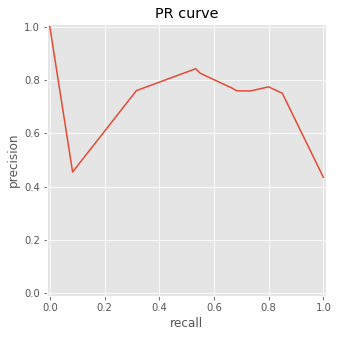

In [60]:
plt.figure(figsize=(5, 5))
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat_proba[:,1])

(-0.01, 1.01)

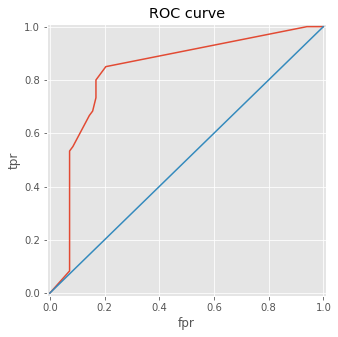

In [62]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [64]:
roc_auc_score(y_test, y_hat_proba[:,1])

0.8327309236947792

Попробуйте сами все это посчитать для случайного леса

In [73]:
# Обучаем случайный лес
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [58]:
# Предсказанные метки
y_hat = forest.predict(X_test)

# Предсказанные вероятности каждого класса
y_hat_proba = forest.predict_proba(X_test)

In [59]:
print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat))

0.797202797203
0.829787234043


In [60]:
precision, recall, thresholds = \
precision_recall_curve(y_test, y_hat_proba[:,1])

(-0.01, 1.01)

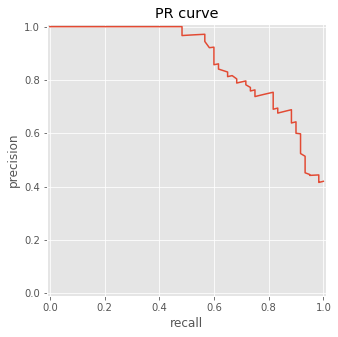

In [61]:
plt.figure(figsize=(5, 5))
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat_proba[:,1])

(-0.01, 1.01)

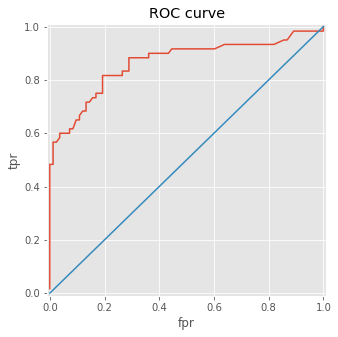

In [63]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

## Кросс-валидация

<img src='http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/06/07_cross_validation_diagram.png'>

In [71]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

In [66]:
# Кросс валидация на 3х фолдах
cv = KFold(n_splits=3, random_state=123)

In [67]:
# train_idx и test_idx - это индексы объектов, попадающие в обучающие и валидационные части
for train_idx, test_idx in cv.split(X, y):
    print('=== Очередной фолд ===')
    print('Обучение - {} объектов, валидация - {} объектов'.format(train_idx.shape[0], test_idx.shape[0]))
    print('Доля выживших: обучение - {}, валидация - {}'.format(y[train_idx].mean(), y[test_idx].mean()))

=== Очередной фолд ===
Обучение - 474 объектов, валидация - 238 объектов
Доля выживших: обучение - 0.42616033755274263, валидация - 0.36134453781512604
=== Очередной фолд ===
Обучение - 475 объектов, валидация - 237 объектов
Доля выживших: обучение - 0.37473684210526315, валидация - 0.4641350210970464
=== Очередной фолд ===
Обучение - 475 объектов, валидация - 237 объектов
Доля выживших: обучение - 0.4126315789473684, валидация - 0.3881856540084388


In [68]:
# Кросс валидация на 3х фолдах с сохранением пропорции классов в каждом фолде
cv = StratifiedKFold(n_splits=3, random_state=123)

In [69]:
# train_idx и test_idx - это индексы объектов, попадающие в обучающие и валидационные части
for train_idx, test_idx in cv.split(X, y):
    print('=== Очередной фолд ===')
    print('Обучение - {} объектов, валидация - {} объектов'.format(train_idx.shape[0], test_idx.shape[0]))
    print('Доля выживших: обучение - {}, валидация - {}'.format(y[train_idx].mean(), y[test_idx].mean()))

=== Очередной фолд ===
Обучение - 474 объектов, валидация - 238 объектов
Доля выживших: обучение - 0.4050632911392405, валидация - 0.40336134453781514
=== Очередной фолд ===
Обучение - 475 объектов, валидация - 237 объектов
Доля выживших: обучение - 0.40421052631578946, валидация - 0.4050632911392405
=== Очередной фолд ===
Обучение - 475 объектов, валидация - 237 объектов
Доля выживших: обучение - 0.40421052631578946, валидация - 0.4050632911392405


In [74]:
forest = RandomForestClassifier(max_depth=3, random_state=42)

# Посчитаем меру качества roc_auc на кросс-валидации для модели forest
scores = cross_val_score(
    forest,
    X,
    y,
    scoring='roc_auc',
    cv=cv
)

In [75]:
# Оценки roc-auc на кросс-валидации
scores

array([0.80318369, 0.85682624, 0.87477837])

In [87]:
# Для оценки обобщающей способности обычно берут среднее
scores.mean()

0.84492943179169577